In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = os.path.join(os.getcwd(), "dataset")

In [3]:
test_normal = os.path.join(data_path, "test", "normal")
train_normal = os.path.join(data_path, "train",  "normal")
val_normal = os.path.join(data_path, "val",  "normal")

test_infected_covid = os.path.join(data_path, "test", "infected", "covid")
train_infected_covid = os.path.join(data_path, "train", "infected", "covid")
val_infected_covid = os.path.join(data_path, "val", "infected", "covid")

test_infected_non_covid = os.path.join(data_path, "test", "infected", "non-covid")
train_infected_non_covid = os.path.join(data_path, "train", "infected", "non-covid")
val_infected_non_covid = os.path.join(data_path, "val", "infected", "non-covid")


In [4]:
def count_files(input_path):
    return len([name for name in os.listdir(input_path) if os.path.isfile(os.path.join(input_path, name))])

In [5]:
total_normal = 0
total_infected_covid = 0
total_infected_non_covid = 0

test_normal = count_files(test_normal)
train_normal = count_files(train_normal)
val_normal = count_files(val_normal)

total_normal += test_normal + train_normal + val_normal

test_infected_covid = count_files(test_infected_covid)
train_infected_covid = count_files(train_infected_covid)
val_infected_covid = count_files(val_infected_covid)

total_infected_covid += test_infected_covid + train_infected_covid + val_infected_covid

test_infected_non_covid = count_files(test_infected_non_covid)
train_infected_non_covid = count_files(train_infected_non_covid)
val_infected_non_covid = count_files(val_infected_non_covid)

total_infected_non_covid += test_infected_non_covid + train_infected_non_covid + val_infected_non_covid

print("Total number images in normal class: ", total_normal)
print("Total number images in infected and covid class: ", total_infected_covid)
print("Total number images in infected and non-covid class: ", total_infected_non_covid)


Total number images in normal class:  1583
Total number images in infected and covid class:  1493
Total number images in infected and non-covid class:  2780


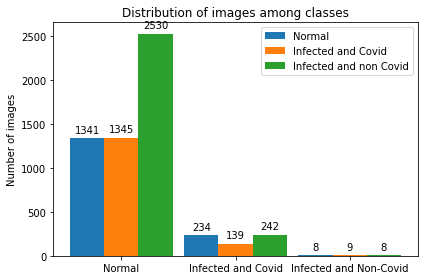

In [7]:
labels = ['Normal', 'Infected and Covid', 'Infected and Non-Covid']

train = [train_normal, train_infected_covid, train_infected_non_covid]
test = [test_normal, test_infected_covid, test_infected_non_covid]
val = [val_normal, val_infected_covid, val_infected_non_covid]

normal = [train_normal, test_normal, val_normal]
infected_covid = [train_infected_covid, test_infected_covid, val_infected_covid]
infected_non_covid = [train_infected_non_covid, test_infected_non_covid, val_infected_non_covid]

men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, normal, width, label='Normal')
rects2 = ax.bar(x, infected_covid, width, label='Infected and Covid')
rects3 = ax.bar(x + width, infected_non_covid, width, label='Infected and non Covid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of images')
ax.set_title('Distribution of images among classes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
fig.savefig("distribution.png")